In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
train=ds['train']
test=ds['test']
test_gt=np.array(ds['test']['label'])

In [9]:
degrees=[1,2,5,10,20]
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)

for d in degrees:
    positive_metric=positive.filter(lambda x: x['min_angle']<=d)
    negative_metric=negative.filter(lambda x: x['min_angle']>d)
    print('----------------------------------------')
    print(f'Degree: {d}...')
    print(f'Positive Proportion: {len(positive_metric)/len(positive)}')
    print(f'Negative Proportion: {len(negative_metric)/len(negative)}')

----------------------------------------
Degree: 1...
Positive Proportion: 0.8216374269005848
Negative Proportion: 0.9261194029850747
----------------------------------------
Degree: 2...
Positive Proportion: 0.916267942583732
Negative Proportion: 0.9055970149253731
----------------------------------------
Degree: 5...
Positive Proportion: 0.9731525784157363
Negative Proportion: 0.8828358208955224
----------------------------------------
Degree: 10...
Positive Proportion: 0.9920255183413078
Negative Proportion: 0.8597014925373134
----------------------------------------
Degree: 20...
Positive Proportion: 0.998936735778841
Negative Proportion: 0.8264925373134329


In [4]:
degrees=[1,2,5,10,20]
heuristic_accuracy=[]
heuristic_fp=[]
heuristic_fn=[]
llama_accuracy=[]
llama_fp=[]
llama_fn=[]
mistral_accuracy=[]
mistral_fp=[]
mistral_fn=[]
for d in degrees:
    heuristis_pred=np.array(test['min_angle'])<=d
    llama_pred=np.load(f'llama3_degree_{d}.npy')
    mistral_pred=np.load(f'mistral_degree_{d}.npy')    
    llama_pred=np.array([int(i.replace('<|eot_id|>', '').split('Label:')[1].strip()) for i in llama_pred])
    mistral_pred=np.array([int(i.replace('</s>', '').split('Label:')[1].strip()) for i in mistral_pred])    

    ## accuracy
    heuristic_accuracy.append(accuracy_score(test_gt, heuristis_pred))
    llama_accuracy.append(accuracy_score(test_gt, llama_pred))
    mistral_accuracy.append(accuracy_score(test_gt, mistral_pred))    

    ## fp & fn rave
    _,h_fp,h_fn,_=confusion_matrix(test_gt, heuristis_pred).ravel()
    _,l_fp,l_fn,_=confusion_matrix(test_gt, llama_pred).ravel()
    _,m_fp,m_fn,_=confusion_matrix(test_gt, mistral_pred).ravel()    

    heuristic_fp.append(h_fp/len(test))
    heuristic_fn.append(h_fn/len(test))
    llama_fp.append(l_fp/len(test))
    llama_fn.append(l_fn/len(test))
    mistral_fp.append(m_fp/len(test))
    mistral_fn.append(m_fn/len(test))    

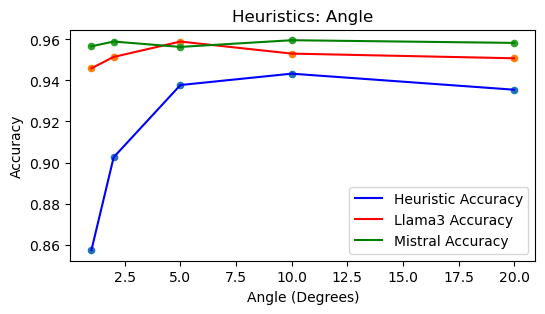

In [5]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_accuracy,label='Heuristic Accuracy',color='blue')
plt.plot(degrees,llama_accuracy,label='Llama3 Accuracy',color='red')
plt.plot(degrees,mistral_accuracy,label='Mistral Accuracy',color='green')
plt.scatter(degrees, heuristic_accuracy,s=20)
plt.scatter(degrees, llama_accuracy,s=20)
plt.scatter(degrees, mistral_accuracy,s=20)
#plt.hlines(max(heuristic_accuracy), xmin=degrees[np.argmax(heuristic_accuracy)]-2.5, xmax=degrees[np.argmax(heuristic_accuracy)]+2.5, linestyle='dashed', label='Best Heuristic')
#plt.hlines(max(llama_accuracy), xmin=degrees[np.argmax(llama_accuracy)]-2.5, xmax=degrees[np.argmax(llama_accuracy)]+2.5, linestyle='dashed', color='orange',label='Best Llama')
#plt.hlines(max(mistral_accuracy), xmin=degrees[np.argmax(mistral_accuracy)]-2.5, xmax=degrees[np.argmax(mistral_accuracy)]+2.5, linestyle='dashed', color='green',label='Best Mistral')
plt.title('Heuristics: Angle')
plt.ylabel('Accuracy')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass

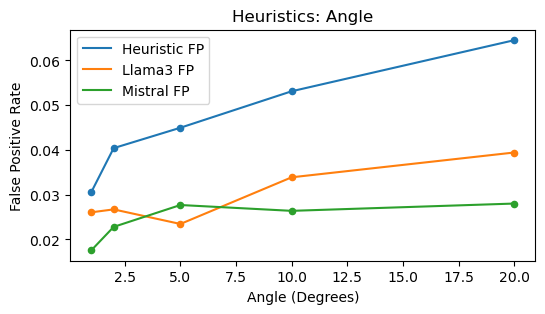

In [6]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_fp,label='Heuristic FP')
plt.plot(degrees,llama_fp,label='Llama3 FP')
plt.plot(degrees,mistral_fp,label='Mistral FP')
plt.scatter(degrees, heuristic_fp,s=20)
plt.scatter(degrees, llama_fp,s=20)
plt.scatter(degrees, mistral_fp,s=20)
plt.title('Heuristics: Angle')
plt.ylabel('False Positive Rate')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass

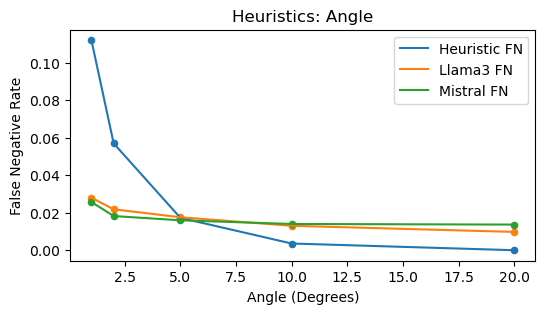

In [7]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_fn,label='Heuristic FN')
plt.plot(degrees,llama_fn,label='Llama3 FN')
plt.plot(degrees,mistral_fn,label='Mistral FN')
plt.scatter(degrees, heuristic_fn,s=20)
plt.scatter(degrees, llama_fn,s=20)
plt.scatter(degrees, mistral_fn,s=20)
plt.title('Heuristics: Angle')
plt.ylabel('False Negative Rate')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass